<a href="https://colab.research.google.com/github/oxanaRC/CE902/blob/main/CE902_practice_zillows_home_value_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# to see path of our current directory
!pwd

/content


Importing dataset:

In [2]:
!git clone https://github.com/oxanaRC/CE902.git

Cloning into 'CE902'...
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 9 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (9/9), done.


listing of the current directory:

In [3]:
!ls

CE902  sample_data


exploring and pre-processing the data:

In [4]:
import pandas as pd


In [5]:
df = pd.read_csv('CE902/housepricedata.csv')

In [6]:
df

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1
...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,5,953,2,1,3,7,1,460,1
1456,13175,6,6,1542,2,0,3,7,2,500,1
1457,9042,7,9,1152,2,0,4,9,2,252,1
1458,9717,5,6,1078,1,0,2,5,0,240,0


**Features:**
Lot Area (in sq ft)
Overall Quality (scale from 1 to 10)
Overall Condition (scale from 1 to 10)
Total Basement Area (in sq ft)
Number of Full Bathrooms
Number of Half Bathrooms
Number of Bedrooms above ground
Total Number of Rooms above ground
Number of Fireplaces
Garage Area (in sq ft)

**In our last column, we have the feature that we would like to predict:**

Is the house price above the median or not? (1 for yes and 0 for no)

In [7]:
dataset = df.values


In [9]:
dataset

array([[ 8450,     7,     5, ...,     0,   548,     1],
       [ 9600,     6,     8, ...,     1,   460,     1],
       [11250,     7,     5, ...,     1,   608,     1],
       ...,
       [ 9042,     7,     9, ...,     2,   252,     1],
       [ 9717,     5,     6, ...,     0,   240,     0],
       [ 9937,     5,     6, ...,     0,   276,     0]])

Splitting the dataset into input features (X) and the feature we wish to predict (Y).

In [10]:
X = dataset[:,0:10]
Y = dataset[:,10]

Scaling of the input features are similar. (Right now, features such as lot area are in the order of the thousands, a score for overall quality is ranged from 1 to 10, and the number of fireplaces tend to be 0, 1 or 2)
Using scikit-learn library for scaling the data.

In [11]:
from sklearn import preprocessing


In [12]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [13]:
X_scale


array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

Splitting data into training, testing and validation datasets

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)

In [16]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

The code above splits the val_and_test size equally to the validation set and the test set.

In summary, we now have a total of six variables:

X_train (10 input features, 70% of full dataset)
X_val (10 input features, 15% of full dataset)
X_test (10 input features, 15% of full dataset)
Y_train (1 label, 70% of full dataset)
Y_val (1 label, 15% of full dataset)
Y_test (1 label, 15% of full dataset)

In [17]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)


The training set has 1022 data points while the validation and test set has 219 data points each. The X variables have 10 input features, while the Y variables only has one feature to predict.

Setting up the neural network using Keras.

Hidden layer 1: 32 neurons, ReLU activation
Hidden layer 2: 32 neurons, ReLU activation
Output Layer: 1 neuron, Sigmoid activation

Using Sequential model: describing the layers above in sequence.

In [18]:
from keras.models import Sequential
from keras.layers import Dense

In [19]:
model = Sequential([
    Dense(32, activation='relu', input_shape=(10,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])

Specifying which algorithm to use for optimization (sgd - stochastic gradient descent).

Specifying which loss function to use (binary cross entropy - values 1 or 0).

Specifying what other metrics you to track apart from the loss function.

In [20]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])


Training. Fitting training data to the model.

In [21]:
hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 4s 14ms/step - loss: 0.7188 - accuracy: 0.4888 - val_loss: 0.7085 - val_accuracy: 0.4612
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6979 - accuracy: 0.5182 - val_loss: 0.6943 - val_accuracy: 0.4749
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6875 - accuracy: 0.5427 - val_loss: 0.6844 - val_accuracy: 0.6986
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6835 - accuracy: 0.6772 - val_loss: 0.6769 - val_accuracy: 0.6941
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6799 - accuracy: 0.6844 - val_loss: 0.6707 - val_accuracy: 0.6849
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6735 - accuracy: 0.6276 - val_loss: 0.6653 - val_accuracy: 0.6712
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6666 - accuracy: 0.6506 - val_loss: 0.6601 - val_accuracy: 0.7032
Epoch 8/100


Evaluation on the test set: accuracy check.

In [22]:
model.evaluate(X_test, Y_test)[1]

7/7 [==============================] - 0s 2ms/step - loss: 0.2764 - accuracy: 0.8858


0.8858447670936584


Visualising loss on the training data and loss on the validation data.

In [23]:
import matplotlib.pyplot as plt


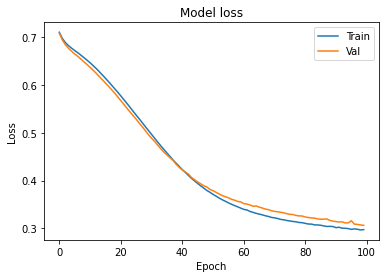

In [24]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

Plotting training accuracy and validation accuracy:

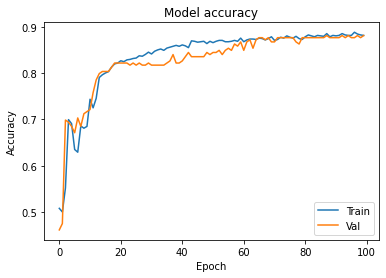

In [25]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()